# 🏨 SHODWE HOTEL – Python Analytics Project

An end-to-end hotel revenue & booking analytics project using **Python**.

**Tools Used:** Pandas, NumPy, Matplotlib, Seaborn


## 📌 Project Overview
This project analyzes booking, revenue, and occupancy data for **Shodwe Hotel**.
The objective is to derive actionable business insights related to demand patterns,
revenue performance, customer behavior, and operational efficiency.


## 🗂️ Dataset Structure
**Dimension Tables:** dim_date, dim_hotels, dim_rooms  
**Fact Tables:** fact_bookings, fact_aggregated_bookings

All tables are joined using business keys to form a master analytical dataset.

## 📊 Key KPIs Covered
- Total Bookings
- Occupancy Rate
- Cancellation Rate
- Utilized Bookings
- Monthly & Weekly Trends
- Weekday vs Weekend Performance
- Revenue by City, Hotel, and Room Class


In [1]:
# Importing core libraries for SHODWE HOTEL data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading dimension and fact tables for SHODWE HOTEL analytics
dim_date = pd.read_csv("dim_date.csv")
dim_hotels = pd.read_csv("dim_hotels.csv")
dim_rooms = pd.read_csv("dim_rooms.csv")
fact_bookings = pd.read_csv("fact_bookings.csv")
fact_agg = pd.read_csv("fact_aggregated_bookings.csv")

In [3]:
# Previewing the top records of all dimension and fact tables
dim_date.head()
dim_hotels.head()
dim_rooms.head()
fact_bookings.head()
fact_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-05-2022,RT1,25,30
1,19562,01-05-2022,RT1,28,30
2,19563,01-05-2022,RT1,23,30
3,17558,01-05-2022,RT1,13,19
4,16558,01-05-2022,RT1,18,19


In [4]:
# Checking data types, structure, and null values of all tables
dim_date.info()
dim_hotels.info()
dim_rooms.info()
fact_agg.info()
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     int64 
 3   day_type  92 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-nu

In [5]:
# Merging fact_bookings with hotel details using property_id
fb_hotel = fact_bookings.merge(
    dim_hotels,
    on="property_id",
    how="left"
)

In [6]:
# Adding date-related attributes to booking data using check-in date
fb_hotel_date = fb_hotel.merge(
    dim_date,
    left_on="check_in_date",
    right_on="date",
    how="left"
)

In [7]:
# Creating the final master dataset by joining room details
final_df = fb_hotel_date.merge(
    dim_rooms,
    left_on="room_category",
    right_on="room_id",
    how="left"
)

In [8]:
# Validating the final dataset structure and sample records
final_df.shape
final_df.columns
final_df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,booking_channel,property_name,category,city,date,mmm yy,week no,day_type,room_id,room_class
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,...,Travel Agent,Shodwe Grands,Luxury,Delhi,01-05-2022,May-22,19,weekend,RT1,Standard
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,...,OTA,Shodwe Grands,Luxury,Delhi,01-05-2022,May-22,19,weekend,RT1,Standard
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,...,OTA,Shodwe Grands,Luxury,Delhi,01-05-2022,May-22,19,weekend,RT1,Standard
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,...,Direct,Shodwe Grands,Luxury,Delhi,01-05-2022,May-22,19,weekend,RT1,Standard
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,...,Corporate,Shodwe Grands,Luxury,Delhi,01-05-2022,May-22,19,weekend,RT1,Standard


In [9]:
# Revenue Loss (for Cancelled)
final_df["revenue_loss"] = final_df["revenue_generated"] - final_df["revenue_realized"]

In [10]:
# Creating booking status flags for cancellation, check-out, and no-show analysis
final_df["is_cancelled"] = final_df["booking_status"] == "Cancelled"
final_df["is_checked_out"] = final_df["booking_status"] == "Checked Out"
final_df["is_no_show"] = final_df["booking_status"] == "No show"

In [11]:
# Booking Status Count
final_df["booking_status"].value_counts()

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64

In [12]:
# City Wise Revenue
final_df.groupby("city")["revenue_realized"].sum()

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

In [13]:
# 1. Total Revenue
final_df["revenue_realized"].sum()

np.int64(1708771229)

In [14]:
# 2. Total Bookings
total_bookings = final_df["booking_id"].nunique()
total_bookings

134590

In [15]:
# 3. Occupancy Rate
fact_agg["occupancy_rate"] = (
    fact_agg["successful_bookings"] / fact_agg["capacity"]
) * 100

overall_occupancy_rate = fact_agg["occupancy_rate"].mean()
overall_occupancy_rate

np.float64(58.30840154442642)

In [16]:
# 4. Cancellation Rate
cancellation_rate = (
    final_df[final_df["booking_status"] == "Cancelled"].shape[0]
    / final_df.shape[0]
) * 100
cancellation_rate

24.830968125417936

In [17]:
# 5. Utilized Capacity
utilized_bookings = final_df[
    final_df["booking_status"].isin(["Checked Out", "No show"])
].shape[0]

utilized_bookings

94411

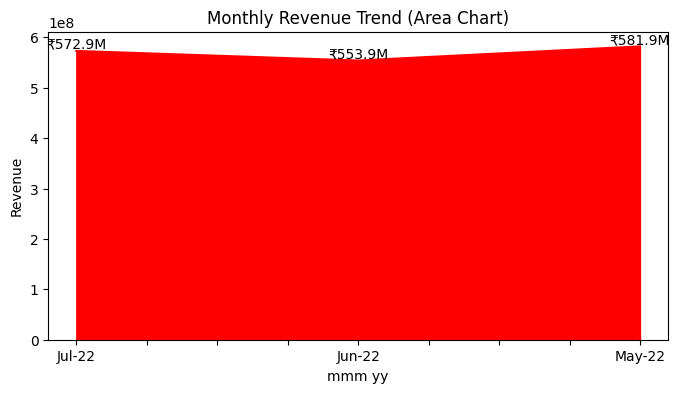

In [18]:
# 6. Monthly Trend Analysis (Revenue)
monthly_rev = final_df.groupby("mmm yy")["revenue_realized"].sum()

ax = monthly_rev.plot(
    kind="area",
    figsize=(8,4),
    color="red",
    title="Monthly Revenue Trend (Area Chart)"
)

for x, y in enumerate(monthly_rev):
    ax.text(x, y, f"₹{y/1e6:.1f}M", ha="center", va="bottom")

plt.ylabel("Revenue")
plt.show()

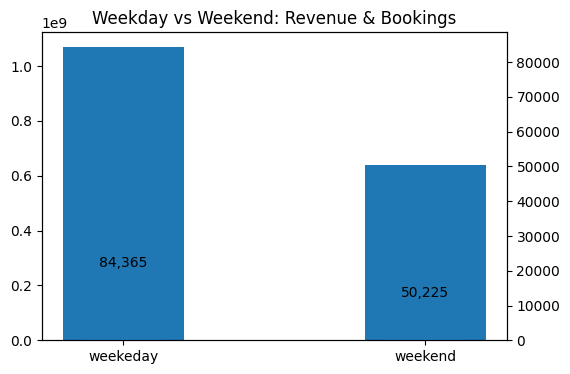

In [19]:
# 7. Weekday & Weekend Revenue and Bookings
wd_we = final_df.groupby("day_type").agg(
    bookings=("booking_id", "count"),
    revenue=("revenue_realized", "sum")
).reset_index()

fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()

b1 = ax1.bar(wd_we["day_type"], wd_we["revenue"], width=0.4)
b2 = ax2.bar(wd_we["day_type"], wd_we["bookings"], width=0.25)

ax1.set_title("Weekday vs Weekend: Revenue & Bookings")

for r, b in zip(b1, b2):
    ax1.text(r.get_x()+r.get_width()/2, r.get_height()*0.55,
             f"₹{r.get_height()/1e6:.1f}M", ha="center")
    ax2.text(b.get_x()+b.get_width()/2, b.get_height()*0.25,
             f"{int(b.get_height()):,}", ha="center")

plt.show()

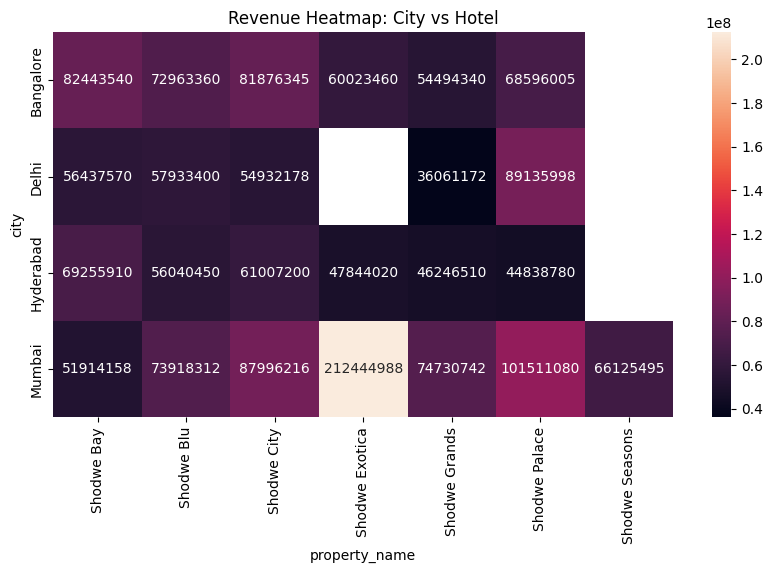

In [20]:
# 8. Revenue by City and Hotel
city_hotel_pivot = final_df.pivot_table(
    values="revenue_realized",
    index="city",
    columns="property_name",
    aggfunc="sum"
)

plt.figure(figsize=(10,5))
sns.heatmap(
    city_hotel_pivot,
    annot=True,
    fmt=".0f"
)
plt.title("Revenue Heatmap: City vs Hotel")
plt.show()

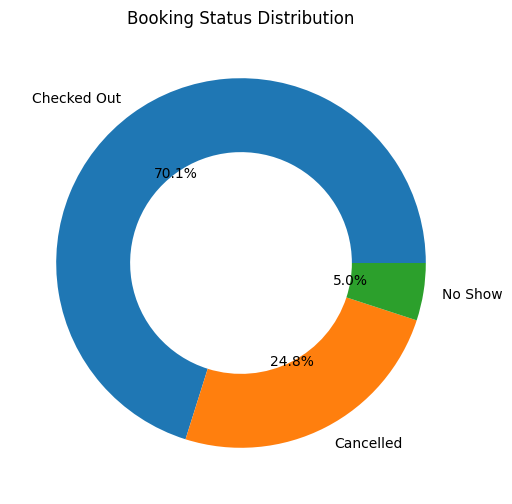

In [21]:
# 9. Check Out / Cancelled / No Show
status_counts = final_df["booking_status"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct="%1.1f%%",
    wedgeprops=dict(width=0.4)
)
plt.title("Booking Status Distribution")
plt.show()

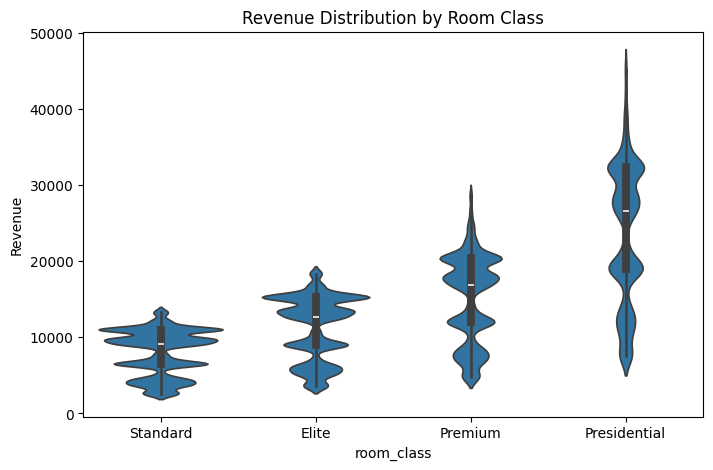

In [22]:
# 10. Class-wise Revenue
plt.figure(figsize=(8,5))
sns.violinplot(
    x="room_class",
    y="revenue_realized",
    data=final_df
)
plt.title("Revenue Distribution by Room Class")
plt.ylabel("Revenue")
plt.show()

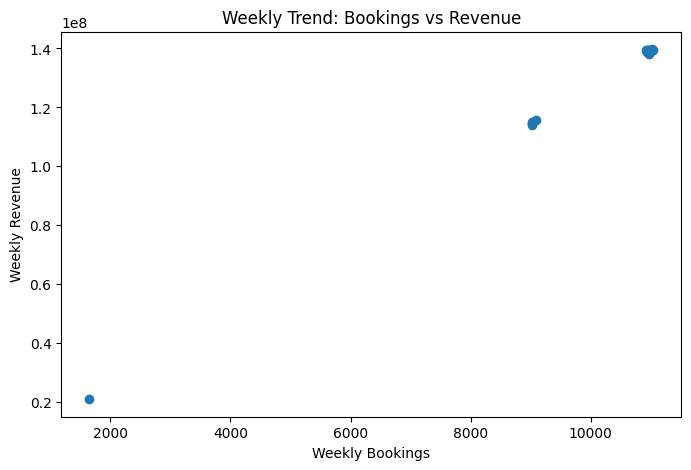

In [23]:
# 11. Weekly Trend – Key Metrics
weekly_metrics = final_df.groupby("week no").agg({
    "booking_id": "count",
    "revenue_realized": "sum"
}).reset_index()

plt.figure(figsize=(8,5))
plt.scatter(
    weekly_metrics["booking_id"],
    weekly_metrics["revenue_realized"]
)
plt.xlabel("Weekly Bookings")
plt.ylabel("Weekly Revenue")
plt.title("Weekly Trend: Bookings vs Revenue")
plt.show()